# Homework 10
## Name: Chinmayi Bengaluru Prakash

USC ID: 7142609162

## Importing Packages

In [55]:
from timeit import default_timer as timer
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import time
import math
import timeit
from math import e

%matplotlib inline
start_time = timer()

In [4]:
plt.rcParams.update({'figure.figsize':(12,6)})
plt.rcParams.update({'font.size':20})

## Import Data & Exploration

In [5]:
data = pd.read_csv('card transactions.csv')

In [6]:
data.shape

(96753, 10)

In [7]:
data.head()

Recnum     Cardnum        Date       Merchnum        Merch description  \
0       1  5142190439  2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
1       2  5142183973  2006-01-01    61003026333  SERVICE MERCHANDISE #81   
2       3  5142131721  2006-01-01  4503082993600        OFFICE DEPOT #191   
3       4  5142148452  2006-01-01  5509006296254   FEDEX SHP 12/28/09 AB#   
4       5  5142190439  2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   

  Merch state  Merch zip Transtype  Amount  Fraud  
0          TN    38118.0         P    3.62      0  
1          MA     1803.0         P   31.42      0  
2          MD    20706.0         P  178.49      0  
3          TN    38118.0         P    3.62      0  
4          TN    38118.0         P    3.62      0

In [8]:
data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud'],
      dtype='object')

In [9]:
# Changing Datatypes
data['Date'] = pd.to_datetime(data['Date'])
data['Merchnum']: lambda x: str(x)

In [10]:
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [11]:
data.describe()

Recnum       Cardnum     Merch zip        Amount         Fraud
count  96753.000000  9.675300e+04  92097.000000  9.675300e+04  96753.000000
mean   48377.000000  5.142202e+09  44706.596740  4.278857e+02      0.010945
std    27930.329635  5.567084e+04  28369.537945  1.000614e+04      0.104047
min        1.000000  5.142110e+09      1.000000  1.000000e-02      0.000000
25%    24189.000000  5.142152e+09  20855.000000  3.348000e+01      0.000000
50%    48377.000000  5.142196e+09  38118.000000  1.379800e+02      0.000000
75%    72565.000000  5.142246e+09  63103.000000  4.282000e+02      0.000000
max    96753.000000  5.142847e+09  99999.000000  3.102046e+06      1.000000

In [12]:
data.count()

Recnum               96753
Cardnum              96753
Date                 96753
Merchnum             93378
Merch description    96753
Merch state          95558
Merch zip            92097
Transtype            96753
Amount               96753
Fraud                96753
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [14]:
numrecords = len(data)
numrecords

96753

Note: Merchnum, Merch state and Merch zip have missing values

In [16]:
df = data.copy()

# Data Preparation

## Excluding bad records

In [18]:
temp = (df[df['Merch zip'].notna()]['Merch zip'].astype(float)).astype(int)
temp2 = temp.apply(lambda x: '{0:0>5}'.format(x))
temp3 = pd.DataFrame(temp2.astype('str'))

In [19]:
df = df.merge(temp3, how='left', left_index= True, right_index= True)

In [20]:
df.drop(['Merch zip_x'],axis=1, inplace=True)

In [21]:
df.columns = ['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Transtype', 'Amount', 'Fraud', 'Merch zip']

In [22]:
cols = ['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state','Merch zip', 'Transtype', 'Amount', 'Fraud']
df = df[cols]

### Removing all but "P" type of transactions

In [23]:
df['Transtype'].value_counts()

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: int64

In [24]:
# Keeping just "P" type of transactions
df = df[df["Transtype"] == 'P']

In [25]:
df.shape

(96398, 10)

In [26]:
df['Amount'].describe().round(2)

count      96398.00
mean         428.03
std        10024.46
min            0.01
25%           33.46
50%          137.98
75%          428.25
max      3102045.53
Name: Amount, dtype: float64

In [27]:
df[df["Amount"] == df["Amount"].max()]

Recnum     Cardnum       Date Merchnum Merch description Merch state  \
52714   52715  5142189135 2006-07-13      NaN       INTERMEXICO         NaN   

      Merch zip Transtype      Amount  Fraud  
52714       NaN         P  3102045.53      0

### Removing the outlier in Amount field

In [28]:
# Removing the outlier in Amount field
df.drop(52714, axis=0, inplace=True)

In [29]:
df.shape

(96397, 10)

In [30]:
df['Amount'].describe().round(2)

count    96397.00
mean       395.86
std        832.33
min          0.01
25%         33.46
50%        137.98
75%        428.25
max      47900.00
Name: Amount, dtype: float64

## Imputing missing values

### Filling in Merchnum

In [31]:
merchdes_merchnum = {}
for index, merchdes in df[df['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_merchnum :
        merchdes_merchnum[merchdes] = df.loc[index, 'Merchnum']

In [32]:
# fill in by mapping with Merch description
df['Merchnum'] = df['Merchnum'].fillna(df['Merch description'].map(merchdes_merchnum))

In [33]:
# assign unknown for adjustments transactions
df['Merchnum'] = df['Merchnum'].mask(df['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
df['Merchnum'] = df['Merchnum'].mask(df['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

### Filling in Merch Zip

In [34]:
merchnum_zip = {}
for index, merchnum in df[df['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_zip :
        merchnum_zip[merchnum] = df.loc[index, 'Merch zip']

merchdes_zip = {}
for index, merchdes in df[df['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_zip :
        merchdes_zip[merchdes] = df.loc[index, 'Merch zip']


In [35]:
# fill in by mapping with merchnum and merch description
df['Merch zip'] = df['Merch zip'].fillna(df['Merchnum'].map(merchnum_zip))
df['Merch zip'] = df['Merch zip'].fillna(df['Merch description'].map(merchdes_zip))

# assign unknown for adjustments transactions
df['Merch zip'] = df['Merch zip'].mask(df['Merch zip'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
df['Merch zip'] = df['Merch zip'].mask(df['Merch zip'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

# fill the rest with unknown
df = df.fillna('unknown')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 96397 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96397 non-null  int64         
 1   Cardnum            96397 non-null  int64         
 2   Date               96397 non-null  datetime64[ns]
 3   Merchnum           96397 non-null  object        
 4   Merch description  96397 non-null  object        
 5   Merch state        96397 non-null  object        
 6   Merch zip          96397 non-null  object        
 7   Transtype          96397 non-null  object        
 8   Amount             96397 non-null  float64       
 9   Fraud              96397 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 10.1+ MB


### Merch State

In [36]:
zip_state = {}
for index, zip5 in df[df['Merch zip'].notnull()]['Merch zip'].items():
    if zip5 not in zip_state:
        zip_state[zip5] = df.loc[index, 'Merch state']
        
zip_state['00926'] = 'PR'
zip_state['00929'] = 'PR'
zip_state['00934'] = 'PR'
zip_state['00902'] = 'PR'
zip_state['00738'] = 'PR'
zip_state['90805'] = 'CA'
zip_state['76302'] = 'TX'
zip_state['00914'] = 'PR'
zip_state['95461'] = 'CA'
zip_state['00680'] = 'PR'
zip_state['00623'] = 'PR'
zip_state['00726'] = 'PR'
zip_state['00936'] = 'PR'
zip_state['12108'] = 'NY'
zip_state['00791'] = 'PR'
zip_state['00907'] = 'PR'
zip_state['00922'] = 'PR'
zip_state['00920'] = 'PR'
zip_state['00801'] = 'VI'
zip_state['31040'] = 'GA'
zip_state['41160'] = 'KY'
zip_state['00681'] = 'PR'

In [37]:
merchnum_state = {}
for index, merchnum in df[df['Merchnum'].notnull()]['Merchnum'].items():
    if merchnum not in merchnum_state :
        merchnum_state[merchnum] = df.loc[index, 'Merch state']

merchdes_state = {}
for index, merchdes in df[df['Merch description'].notnull()]['Merch description'].items():
    if merchdes not in merchdes_state :
        merchdes_state[merchdes] = df.loc[index, 'Merch state']

# fill in by mapping with zip, merchnum and merch description
df['Merch state'] = df['Merch state'].fillna(df['Merch zip'].map(zip_state))
df['Merch state'] = df['Merch state'].fillna(df['Merchnum'].map(merchnum_state))
df['Merch state'] = df['Merch state'].fillna(df['Merch description'].map(merchdes_state))

# assign unknown for adjustments transactions
df['Merch state'] = df['Merch state'].mask(df['Merch description'] == 'RETAIL CREDIT ADJUSTMENT', 'unknown')
df['Merch state'] = df['Merch state'].mask(df['Merch description'] == 'RETAIL DEBIT ADJUSTMENT', 'unknown')

In [38]:
df.isna().sum()

Recnum               0
Cardnum              0
Date                 0
Merchnum             0
Merch description    0
Merch state          0
Merch zip            0
Transtype            0
Amount               0
Fraud                0
dtype: int64

In [39]:
df.shape

(96397, 10)

## Creating Variables

### Risk table variables

In [110]:
start = timeit.default_timer()
df['dow'] = df.Date.apply(lambda x: calendar.day_name[x.weekday()])
print('run time: {}s'.format(timeit.default_timer() - start))

run time: 0.4280434580000474s


In [41]:
train_test = df[df.Date < '2006-11-01']
train_test.head()

Recnum     Cardnum       Date       Merchnum        Merch description  \
0       1  5142190439 2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
1       2  5142183973 2006-01-01    61003026333  SERVICE MERCHANDISE #81   
2       3  5142131721 2006-01-01  4503082993600        OFFICE DEPOT #191   
3       4  5142148452 2006-01-01  5509006296254   FEDEX SHP 12/28/09 AB#   
4       5  5142190439 2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   

  Merch state Merch zip Transtype  Amount  Fraud     dow  
0          TN     38118         P    3.62      0  Sunday  
1          MA     01803         P   31.42      0  Sunday  
2          MD     20706         P  178.49      0  Sunday  
3          TN     38118         P    3.62      0  Sunday  
4          TN     38118         P    3.62      0  Sunday

In [42]:
train_test.shape

(83970, 11)

#### Day of Week

In [111]:
start = timeit.default_timer()
c = 3
nmid = 15
y_avg = train_test['Fraud'].mean()
y_dow = train_test.groupby('dow')['Fraud'].mean()

num = train_test.groupby('dow').size()
y_dow_smooth = y_avg + (y_dow - y_avg)/(1 + np.exp(-(num - nmid)/c))
df['low_risk'] = df.dow.map(y_dow_smooth)
print('run time: {}s'.format(timeit.default_timer() - start))

run time: 0.0396408340002381s


In [112]:
start = timeit.default_timer()
y_dow = y_dow.reset_index()
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y_dow['dow'] = pd.Categorical(y_dow['dow'], categories=cats, ordered=True)
y_dow = y_dow.sort_values('dow')
y_dow = y_dow.set_index('dow')
print('run time: {}s'.format(timeit.default_timer() - start))

run time: 0.00812020900002608s


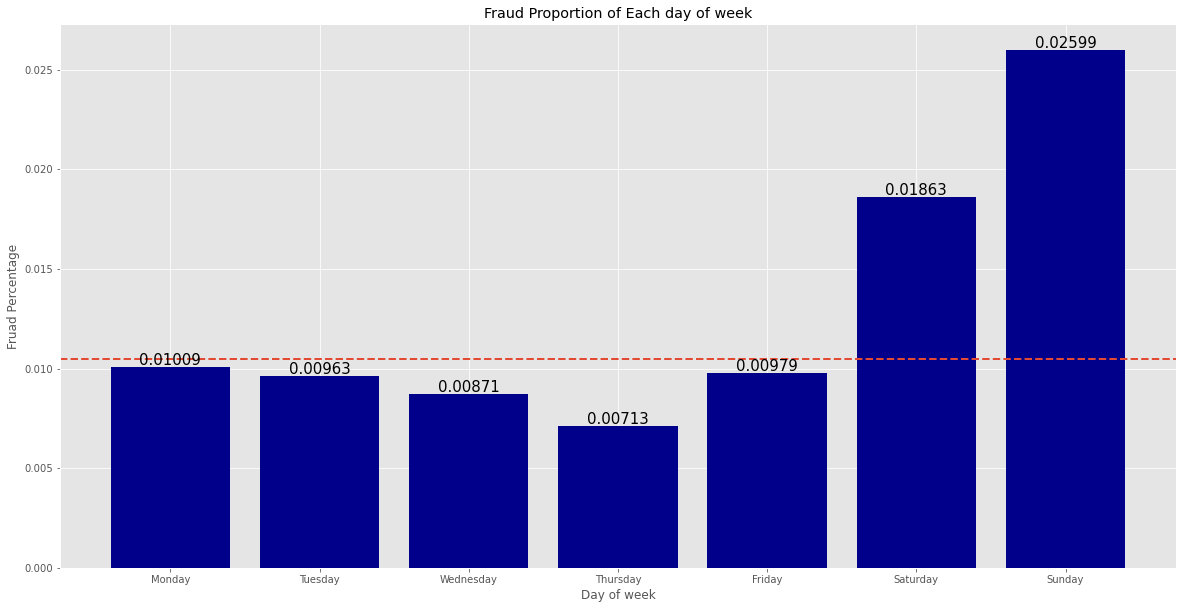

In [45]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(data=y_dow, x=y_dow.index, height='Fraud', color='darkblue')
ax.set_ylim(bottom=0.000)
ax.axhline(y=y_avg, ls='--',lw=2)

for i,v in enumerate(y_dow.index):
    ax.text(v, y_dow.loc[i, 'Fraud'] + 0.0001, round(y_dow.loc[i, 'Fraud'], 5),
           horizontalalignment = 'center', fontsize = 15)
    
ax.set_title('Fraud Proportion of Each day of week')
ax.set_ylabel('Fruad Percentage')
ax.set_xlabel('Day of week')
    
plt.show()

#### Merch State

In [46]:
c = 3
nmid = 15
y_avg = train_test['Fraud'].mean()
y_merchState = train_test.groupby('Merch state')['Fraud'].mean()

num = train_test.groupby('Merch state').size()
y_merchState_smooth = y_avg + (y_merchState - y_avg)/(1 + np.exp(-(num - nmid)/c))
df['y_merchState_risk'] = df['Merch state'].map(y_merchState_smooth)

In [47]:
y_merchState = y_merchState.reset_index()
y_merchState = y_merchState.sort_values('Merch state')
y_merchState = y_merchState.set_index('Merch state')

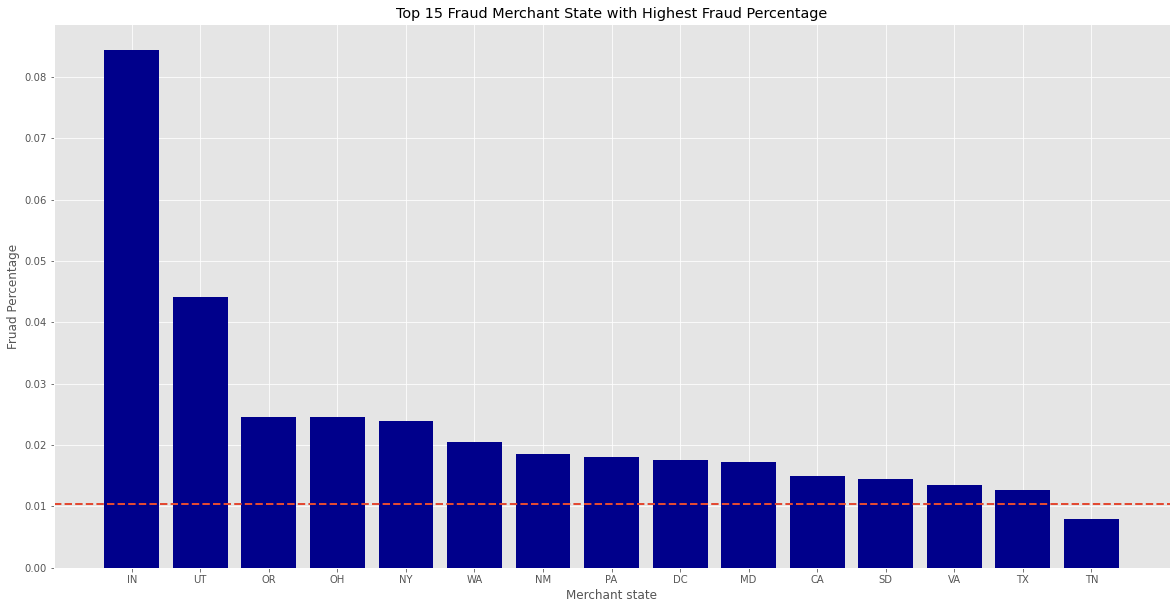

In [48]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20,10))
top15 = y_merchState.sort_values(by='Fraud',ascending=False).head(15)
plt.bar(data=top15, x=top15.index, height='Fraud', color='darkblue')
ax.set_ylim(bottom=0.000)
ax.axhline(y=y_avg, ls='--',lw=2)

ax.set_title('Top 15 Fraud Merchant State with Highest Fraud Percentage')
ax.set_ylabel('Fruad Percentage')
ax.set_xlabel('Merchant state') 
        
plt.show()

### Benford's Law variables

In [49]:
dftemp2 = df[df['Merch description'].str.match(r"[Ff][Ee][Dd][Ee][Xx]") == False].copy()
dftemp2['Amount'] = dftemp2['Amount'].astype(str)

In [50]:
dftemp2.shape

(84622, 13)

In [52]:
def n_low(df_test):
    return ((df_test['Amount'].str.extract(r'([1-9])') == '1') | (df_test['Amount'].str.extract(r'([1-9])') == '2')).sum()

#### Cardnum

In [113]:
start = timeit.default_timer()

cardnum = dftemp2.groupby('Cardnum').apply(n_low)
cardnum['n'] = dftemp2.groupby('Cardnum')['Amount'].count()
cardnum['n_low'] = dftemp2.groupby('Cardnum').apply(n_low)
cardnum = cardnum[['n','n_low']]
cardnum['n_high'] = cardnum['n'] - cardnum['n_low']
cardnum['n_low'] = cardnum['n_low'].replace(0,1)
cardnum['n_high'] = cardnum['n_high'].replace(0,1)

cardnum['R'] = 1.096 * cardnum['n_low'] / cardnum['n_high']
cardnum['1/R'] = 1/cardnum['R']
cardnum['U'] = cardnum[['R','1/R']].max(axis=1)

cardnum['t'] = (cardnum['n']-15)/3
cardnum['U_star_card'] = 1 + ((cardnum['U']-1)/(1+ e**(-cardnum['t'])))

# Pushing to csv for examination
cardnum.sort_values('U_star_card', ascending = False)[0:40].to_csv('Top 40 Cardnum.csv')

cardnum = cardnum.reset_index()
print('run time: {}s'.format(timeit.default_timer() - start))

run time: 2.8704515419999552s


#### Merchnum

In [114]:
start = timeit.default_timer()

merchnums = dftemp2.groupby('Merchnum').apply(n_low)
merchnums['n'] = dftemp2.groupby('Merchnum')['Amount'].count()
merchnums['n_low'] = dftemp2.groupby('Merchnum').apply(n_low)
merchnums = merchnums[['n','n_low']]
merchnums['n_high'] = merchnums['n'] - merchnums['n_low']
merchnums['n_low'] = merchnums['n_low'].replace(0,1)
merchnums['n_high'] = merchnums['n_high'].replace(0,1)

merchnums['R'] = 1.096 * merchnums['n_low'] / merchnums['n_high']
merchnums['1/R'] = 1/merchnums['R']
merchnums['U'] = merchnums[['R','1/R']].max(axis=1)

merchnums['t'] = (merchnums['n']-15)/3
merchnums['U_star_merch'] = 1 + ((merchnums['U']-1)/(1+ e**(-merchnums['t'])))

# Pushing to csv for examination
merchnums.sort_values('U_star_merch', ascending = False)[0:40].to_csv('Top 40 Merchnum.csv')
merchnums = merchnums.reset_index()

print('run time: {}s'.format(timeit.default_timer() - start))

run time: 19.980415083000025s


#### Merging tables part 1

In [64]:
dftemp3 = dftemp2.merge(cardnum, how='left', left_on='Cardnum', right_on='Cardnum')

In [65]:
dftemp3.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud', 'dow',
       'low_risk', 'y_merchState_risk', 'n', 'n_low', 'n_high', 'R', '1/R',
       'U', 't', 'U_star_card'],
      dtype='object')

In [66]:
dftemp3.drop(['n', 'n_low', 'n_high', 'R', '1/R','U', 't'], axis=1, inplace=True)

#### Merging tables part 2

In [67]:
df4 = dftemp3.merge(merchnums, how='left', left_on='Merchnum', right_on='Merchnum')

In [68]:
df4.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud', 'dow',
       'low_risk', 'y_merchState_risk', 'U_star_card', 'n', 'n_low', 'n_high',
       'R', '1/R', 'U', 't', 'U_star_merch'],
      dtype='object')

In [69]:
df4.drop(['n', 'n_low', 'n_high','R', '1/R', 'U', 't'], axis=1, inplace=True)

### Custom Variables

In [116]:
start = timeit.default_timer()

df4['card_merch'] = df4.Cardnum.astype('str') + df4.Merchnum
df4['card_zip'] = df4.Cardnum.astype('str') + df4['Merch zip']
df4['card_state'] = df4.Cardnum.astype('str') + df4['Merch state']
df4['zip3'] = df4['Merch zip'].str[:3]
df4['card_zip3'] = df4.Cardnum.astype('str') + df4['zip3']
df4['merchnum_state'] = df4.Merchnum + df4['Merch state']
df4['merchnum_zip'] = df4.Merchnum + df4['Merch zip']
df4['merchnum_zip3'] = df4.Merchnum + df4['zip3']

print('run time: {}s'.format(timeit.default_timer() - start))

run time: 0.3005313329999808s


### Other variables

In [77]:
attributes = list(df4.iloc[:, np.r_[1,3:7,15:23]].columns)
attributes

['Cardnum',
 'Merchnum',
 'Merch description',
 'Merch state',
 'Merch zip',
 'card_merch',
 'card_zip',
 'card_state',
 'zip3',
 'card_zip3',
 'merchnum_state',
 'merchnum_zip',
 'merchnum_zip3']

In [78]:
# Change Datatype of amount from string to float
df4.Amount = df4.Amount.astype('float')

In [79]:
# Creating copies and backup

df1 = df4.copy()
final = df4.copy()
df1['check_date'] = df1.Date
df1['check_record'] = df1.Recnum
final.shape

(84622, 23)

#### Day-since variables
#### Frequency & Amount variables

In [84]:
start = timeit.default_timer()

for entity in attributes:
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))
    except: print('')
    st = timeit.default_timer()
    
    ## Day-since variables:   
    df_l = df1[['Recnum', 'Date', entity]]
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)
    temp1 = temp[temp.Recnum > temp.check_record][['Recnum','Date','check_date']]\
                                                   .groupby('Recnum')[['Date', 'check_date']].last()
    mapper = (temp1.Date - temp1.check_date).dt.days
    final[entity + '_day_since'] = final.Recnum.map(mapper)
    final[entity + '_day_since'].fillna((final.Date - pd.to_datetime('2010-01-01')).dt.days, inplace = True)
    print('\n' + entity + '_day_since ---> Done')    
    
    ## Frequency & Amount variables:   
    for time in [0,1,3,7,14,30,45,60,90]:
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) &\
                       (temp.Recnum >= temp.check_record)][['Recnum', entity, 'Amount']]
        col_name = entity + '_count_' + str(time)
        mapper2 = temp2.groupby('Recnum')[entity].count()
        final[col_name] = final.Recnum.map(mapper2)
        print(col_name + ' ---> Done')
        final[entity + '_avg_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].mean())
        final[entity + '_max_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].max())
        final[entity + '_med_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].median())
        final[entity + '_total_' + str(time)] = final.Recnum.map(temp2.groupby('Recnum')['Amount'].sum())
        final[entity + '_actual/avg_' + str(time)] = final['Amount'] / final[entity + '_avg_' + str(time)]
        final[entity + '_actual/max_' + str(time)] = final['Amount'] / final[entity + '_max_' + str(time)]
        final[entity + '_actual/med_' + str(time)] = final['Amount'] / final[entity + '_med_' + str(time)]
        final[entity + '_actual/toal_' + str(time)] = final['Amount'] / final[entity + '_total_' + str(time)]
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')

    print('Total run time: {}mins'.format((timeit.default_timer() - start)/60))

Run time for the last entity ----------------- 313.04131866700004s

Cardnum_day_since ---> Done
Cardnum_count_0 ---> Done
Cardnum amount variables over past 0 ---> Done
Cardnum_count_1 ---> Done
Cardnum amount variables over past 1 ---> Done
Cardnum_count_3 ---> Done
Cardnum amount variables over past 3 ---> Done
Cardnum_count_7 ---> Done
Cardnum amount variables over past 7 ---> Done
Cardnum_count_14 ---> Done
Cardnum amount variables over past 14 ---> Done
Cardnum_count_30 ---> Done
Cardnum amount variables over past 30 ---> Done
Cardnum_count_45 ---> Done
Cardnum amount variables over past 45 ---> Done
Cardnum_count_60 ---> Done
Cardnum amount variables over past 60 ---> Done
Cardnum_count_90 ---> Done
Cardnum amount variables over past 90 ---> Done
Total run time: 0.05631450693333211mins
Run time for the last entity ----------------- 3.3779320000001007s

Merchnum_day_since ---> Done
Merchnum_count_0 ---> Done
Merchnum amount variables over past 0 ---> Done
Merchnum_count_1 ---> Don

card_zip3 amount variables over past 60 ---> Done
card_zip3_count_90 ---> Done
card_zip3 amount variables over past 90 ---> Done
Total run time: 6.160850093049999mins
Run time for the last entity ----------------- 1.8726921669999683s

merchnum_state_day_since ---> Done
merchnum_state_count_0 ---> Done
merchnum_state amount variables over past 0 ---> Done
merchnum_state_count_1 ---> Done
merchnum_state amount variables over past 1 ---> Done
merchnum_state_count_3 ---> Done
merchnum_state amount variables over past 3 ---> Done
merchnum_state_count_7 ---> Done
merchnum_state amount variables over past 7 ---> Done
merchnum_state_count_14 ---> Done
merchnum_state amount variables over past 14 ---> Done
merchnum_state_count_30 ---> Done
merchnum_state amount variables over past 30 ---> Done
merchnum_state_count_45 ---> Done
merchnum_state amount variables over past 45 ---> Done
merchnum_state_count_60 ---> Done
merchnum_state amount variables over past 60 ---> Done
merchnum_state_count_90 --

In [83]:
final.shape

(84622, 1089)

### velocity change variables

In [85]:
start = timeit.default_timer()
for ent in attributes:
    for d in ['0', '1']:
        for dd in ['7', '14', '30', '45' ,'60', '90']:
            final[ent + '_count_' + d + '_by_' + dd] =\
            final[ent + '_count_' + d]/(final[ent + '_count_' + dd])/float(dd)
print('run time: {}s'.format(timeit.default_timer() - start))


run time: 0.5607800409998163s


In [86]:
final.shape

(84622, 1245)

#### Velocity day since ratio

In [87]:

start = timeit.default_timer()

for ent in attributes:
    for d in ['0', '1']:
        for dd in ['7', '14', '30', '45', '60', '90']:
            final[ent + '_vdratio_' + d ] =\
            final[ent + '_count_' + d + '_by_' + dd]/(final[ent + '_day_since'])
            
print('run time: {}s'.format(timeit.default_timer() - start))

run time: 0.15228866699999344s


In [88]:
final.shape

(84622, 1271)

#### Uniqueness

In [118]:
start = timeit.default_timer()
for entity in attributes: 
    for field in attributes:
        st = timeit.default_timer()
        if entity != field:
            new_attributes = f'{entity}_{field}_nunique'
            if new_attributes not in list(final.columns):
                mapper3 = final.groupby(entity)[field].nunique()
                final[new_attributes] = final[entity].map(mapper3)
        print(f'Run time for entity {entity} in field {field}'+ ' ---> Done')
print('Total run time: {}mins'.format((timeit.default_timer() - start)/60))

Run time for entity Cardnum in field Cardnum ---> Done
Run time for entity Cardnum in field Merchnum ---> Done
Run time for entity Cardnum in field Merch description ---> Done
Run time for entity Cardnum in field Merch state ---> Done
Run time for entity Cardnum in field Merch zip ---> Done
Run time for entity Cardnum in field card_merch ---> Done
Run time for entity Cardnum in field card_zip ---> Done
Run time for entity Cardnum in field card_state ---> Done
Run time for entity Cardnum in field zip3 ---> Done
Run time for entity Cardnum in field card_zip3 ---> Done
Run time for entity Cardnum in field merchnum_state ---> Done
Run time for entity Cardnum in field merchnum_zip ---> Done
Run time for entity Cardnum in field merchnum_zip3 ---> Done
Run time for entity Merchnum in field Cardnum ---> Done
Run time for entity Merchnum in field Merchnum ---> Done
Run time for entity Merchnum in field Merch description ---> Done
Run time for entity Merchnum in field Merch state ---> Done
Run t

In [90]:
final.shape

(84622, 1427)

#### Acceleration

In [93]:

start = timeit.default_timer()
for ent in attributes:
    for d in ['0', '1']:
        for dd in ['7', '14', '30', '45', '60', '90']:
            final[ent + '_count_' + d + '_by_' + dd + "_sq"] =\
            final[ent + '_count_' + d]/(final[ent + '_count_' + dd])/pow(float(dd),2)
print('run time: {}s'.format(timeit.default_timer() - start))

run time: 1.236887083000056s


In [94]:
final.shape

(84622, 1583)

#### Variability variables 

In [96]:
start = timeit.default_timer()
for entity in attributes:
    try: print('Run time for the last entity ----------------- {}s'.format(timeit.default_timer() - st))
    except: 
        print('')
        st = timeit.default_timer()
    ## Day-since variables:   
    df_l = df1[['Recnum', 'Date', entity,'Amount']]
    df_r = df1[['check_record', 'check_date', entity, 'Amount']]
    temp = pd.merge(df_l, df_r, left_on = entity, right_on = entity)
    
    for time in [0,1,3,7,14,30]:
        temp2 = temp[(temp.check_date >= (temp.Date - dt.timedelta(time))) &\
                       (temp.Recnum >= temp.check_record)][['Recnum', 'check_record',entity, 'Amount_x','Amount_y']]
        temp2['Amount_diff']=temp2['Amount_y']-temp2['Amount_x']

        col_name = entity + '_variability_avg_' + str(time)
        mapper2 = temp2.groupby('Recnum')['Amount_diff'].mean()
        final[col_name] = final.Recnum.map(mapper2)        
        print(col_name + ' ---> Done')
        
        col_name = entity + '_variability_max_' + str(time)
        mapper2 = temp2.groupby('Recnum')['Amount_diff'].max()
        final[col_name] = final.Recnum.map(mapper2)        
        print(col_name + ' ---> Done')
        
        col_name = entity + '_variability_med_' + str(time)
        mapper2 = temp2.groupby('Recnum')['Amount_diff'].median()
        final[col_name] = final.Recnum.map(mapper2)        
        print(col_name + ' ---> Done')
        
        print(entity + ' amount variables over past ' + str(time) + ' ---> Done')
        
print('Total run time: {}mins'.format((timeit.default_timer() - start)/60))

Run time for the last entity ----------------- 167.05771174999973s
Cardnum_variability_avg_0 ---> Done
Cardnum_variability_max_0 ---> Done
Cardnum_variability_med_0 ---> Done
Cardnum amount variables over past 0 ---> Done
Cardnum_variability_avg_1 ---> Done
Cardnum_variability_max_1 ---> Done
Cardnum_variability_med_1 ---> Done
Cardnum amount variables over past 1 ---> Done
Cardnum_variability_avg_3 ---> Done
Cardnum_variability_max_3 ---> Done
Cardnum_variability_med_3 ---> Done
Cardnum amount variables over past 3 ---> Done
Cardnum_variability_avg_7 ---> Done
Cardnum_variability_max_7 ---> Done
Cardnum_variability_med_7 ---> Done
Cardnum amount variables over past 7 ---> Done
Cardnum_variability_avg_14 ---> Done
Cardnum_variability_max_14 ---> Done
Cardnum_variability_med_14 ---> Done
Cardnum amount variables over past 14 ---> Done
Cardnum_variability_avg_30 ---> Done
Cardnum_variability_max_30 ---> Done
Cardnum_variability_med_30 ---> Done
Cardnum amount variables over past 30 ---> 

zip3_variability_avg_0 ---> Done
zip3_variability_max_0 ---> Done
zip3_variability_med_0 ---> Done
zip3 amount variables over past 0 ---> Done
zip3_variability_avg_1 ---> Done
zip3_variability_max_1 ---> Done
zip3_variability_med_1 ---> Done
zip3 amount variables over past 1 ---> Done
zip3_variability_avg_3 ---> Done
zip3_variability_max_3 ---> Done
zip3_variability_med_3 ---> Done
zip3 amount variables over past 3 ---> Done
zip3_variability_avg_7 ---> Done
zip3_variability_max_7 ---> Done
zip3_variability_med_7 ---> Done
zip3 amount variables over past 7 ---> Done
zip3_variability_avg_14 ---> Done
zip3_variability_max_14 ---> Done
zip3_variability_med_14 ---> Done
zip3 amount variables over past 14 ---> Done
zip3_variability_avg_30 ---> Done
zip3_variability_max_30 ---> Done
zip3_variability_med_30 ---> Done
zip3 amount variables over past 30 ---> Done
Run time for the last entity ----------------- 410.637822833s
card_zip3_variability_avg_0 ---> Done
card_zip3_variability_max_0 ---> D

In [111]:
final.shape

(84622, 1817)